In [413]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style

#importing seaborn for statistical plots
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\sys-
[nltk_data]     user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\sys-
[nltk_data]     user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\sys-
[nltk_data]     user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [415]:
# reading the CSV file into pandas dataframe
flight_df = pd.read_excel("aircraft_1.xlsx")

In [416]:
flight_df

,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,44464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain adequate clearanc...,Personnel issues - Psychological - Attention/m...
1,44458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure attain proper touchdown po...,Aircraft - Aircraft systems - Communications s...
2,44456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,The pilot flight instructor’s failure ensure l...,Personnel issues - Task performance - Use of e...
3,44455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
4,44455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
...,...,...,...,...,...,...,...,...,...,...,...,...
540,44065,Tok,Alaska,False,Aviation,None,0,0,0,pilot_issue,The student pilot’s failure maintain direction...,Aircraft - Aircraft oper/perf/capability - Per...
541,44064,Kotzebue,Alaska,False,Aviation,None,0,0,0,pilot_issue,The pilot's failure maintain airspeed conduciv...,Aircraft - Aircraft oper/perf/capability - Per...
542,44064,Athens,Texas,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure extend landing gear approa...,Personnel issues - Task performance - Use of e...
543,44064,Corsicana,Texas,False,Aviation,None,0,0,0,pilot_issue,The student pilot maintain control airplane ta...,Aircraft - Aircraft oper/perf/capability - Per...


In [417]:
#flight_df.drop(columns = ['NtsbNo', 'EventType'], inplace=True)

In [418]:
#flight_df.drop(columns = ['DocketUrl', 'ReportType', 'N#', 'ReportNo'], inplace=True)

In [419]:
#flight_df.drop(columns = ['Mkey', 'OriginalPublishedDate', 'Country'], inplace=True)

In [420]:
#flight_df[flight_df['HasSafetyRec'] == True]

In [421]:
flight_df.drop(columns=['Unnamed: 0', 'EventDate'], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [422]:
#import dateutil.parser

#d = dateutil.parser.parse(flight_df['EventDate'][0]).strftime('%m/%d/%Y')
#print(d) 

In [423]:
#flight_df['EventDate'] = flight_df['EventDate'].apply(lambda x: dateutil.parser.parse(x).strftime('%m/%d/%Y'))

In [424]:
#flight_df

In [425]:
flight_df.describe()

,EventDate,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount
count,545.000000,545.000000,545.000000,545.000000
mean,44245.383486,0.023853,0.110092,0.256881
std,110.683263,0.280132,0.423124,0.565615
min,44064.000000,0.000000,0.000000,0.000000
25%,44141.000000,0.000000,0.000000,0.000000
50%,44266.000000,0.000000,0.000000,0.000000
75%,44337.000000,0.000000,0.000000,0.000000
max,44464.000000,4.000000,6.000000,3.000000


In [426]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   EventDate           545 non-null    int64 
 1   City                545 non-null    object
 2   State               545 non-null    object
 3   HasSafetyRec        545 non-null    bool  
 4   Mode                545 non-null    object
 5   HighestInjuryLevel  545 non-null    object
 6   FatalInjuryCount    545 non-null    int64 
 7   SeriousInjuryCount  545 non-null    int64 
 8   MinorInjuryCount    545 non-null    int64 
 9   Category            545 non-null    object
 10  ProbableCause       545 non-null    object
 11  Findings            545 non-null    object
dtypes: bool(1), int64(4), object(7)
memory usage: 47.5+ KB


In [427]:
flight_df['EventDate'] = pd.to_datetime(flight_df['EventDate'])

In [428]:
flight_df

,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,1970-01-01 00:00:00.000044464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain adequate clearanc...,Personnel issues - Psychological - Attention/m...
1,1970-01-01 00:00:00.000044458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure attain proper touchdown po...,Aircraft - Aircraft systems - Communications s...
2,1970-01-01 00:00:00.000044456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,The pilot flight instructor’s failure ensure l...,Personnel issues - Task performance - Use of e...
3,1970-01-01 00:00:00.000044455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
4,1970-01-01 00:00:00.000044455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1970-01-01 00:00:00.000044065,Tok,Alaska,False,Aviation,None,0,0,0,pilot_issue,The student pilot’s failure maintain direction...,Aircraft - Aircraft oper/perf/capability - Per...
541,1970-01-01 00:00:00.000044064,Kotzebue,Alaska,False,Aviation,None,0,0,0,pilot_issue,The pilot's failure maintain airspeed conduciv...,Aircraft - Aircraft oper/perf/capability - Per...
542,1970-01-01 00:00:00.000044064,Athens,Texas,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure extend landing gear approa...,Personnel issues - Task performance - Use of e...
543,1970-01-01 00:00:00.000044064,Corsicana,Texas,False,Aviation,None,0,0,0,pilot_issue,The student pilot maintain control airplane ta...,Aircraft - Aircraft oper/perf/capability - Per...


In [429]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EventDate           545 non-null    datetime64[ns]
 1   City                545 non-null    object        
 2   State               545 non-null    object        
 3   HasSafetyRec        545 non-null    bool          
 4   Mode                545 non-null    object        
 5   HighestInjuryLevel  545 non-null    object        
 6   FatalInjuryCount    545 non-null    int64         
 7   SeriousInjuryCount  545 non-null    int64         
 8   MinorInjuryCount    545 non-null    int64         
 9   Category            545 non-null    object        
 10  ProbableCause       545 non-null    object        
 11  Findings            545 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(3), object(7)
memory usage: 47.5+ KB


In [430]:
#flight_df.drop(columns = ['EventDate'], inplace=True)

In [431]:
flight_df

,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,1970-01-01 00:00:00.000044464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain adequate clearanc...,Personnel issues - Psychological - Attention/m...
1,1970-01-01 00:00:00.000044458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure attain proper touchdown po...,Aircraft - Aircraft systems - Communications s...
2,1970-01-01 00:00:00.000044456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,The pilot flight instructor’s failure ensure l...,Personnel issues - Task performance - Use of e...
3,1970-01-01 00:00:00.000044455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
4,1970-01-01 00:00:00.000044455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1970-01-01 00:00:00.000044065,Tok,Alaska,False,Aviation,None,0,0,0,pilot_issue,The student pilot’s failure maintain direction...,Aircraft - Aircraft oper/perf/capability - Per...
541,1970-01-01 00:00:00.000044064,Kotzebue,Alaska,False,Aviation,None,0,0,0,pilot_issue,The pilot's failure maintain airspeed conduciv...,Aircraft - Aircraft oper/perf/capability - Per...
542,1970-01-01 00:00:00.000044064,Athens,Texas,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure extend landing gear approa...,Personnel issues - Task performance - Use of e...
543,1970-01-01 00:00:00.000044064,Corsicana,Texas,False,Aviation,None,0,0,0,pilot_issue,The student pilot maintain control airplane ta...,Aircraft - Aircraft oper/perf/capability - Per...


In [432]:
#flight_df.set_index(keys='Time_Stamp',drop=True,inplace=True)
flight_df.head()

,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,1970-01-01 00:00:00.000044464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain adequate clearanc...,Personnel issues - Psychological - Attention/m...
1,1970-01-01 00:00:00.000044458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure attain proper touchdown po...,Aircraft - Aircraft systems - Communications s...
2,1970-01-01 00:00:00.000044456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,The pilot flight instructor’s failure ensure l...,Personnel issues - Task performance - Use of e...
3,1970-01-01 00:00:00.000044455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
4,1970-01-01 00:00:00.000044455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...


In [433]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EventDate           545 non-null    datetime64[ns]
 1   City                545 non-null    object        
 2   State               545 non-null    object        
 3   HasSafetyRec        545 non-null    bool          
 4   Mode                545 non-null    object        
 5   HighestInjuryLevel  545 non-null    object        
 6   FatalInjuryCount    545 non-null    int64         
 7   SeriousInjuryCount  545 non-null    int64         
 8   MinorInjuryCount    545 non-null    int64         
 9   Category            545 non-null    object        
 10  ProbableCause       545 non-null    object        
 11  Findings            545 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(3), object(7)
memory usage: 47.5+ KB


In [434]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
flight_df.plot()
plt.grid();

ValueError: view limit minimum -35958.15000000003 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [435]:
flight_df = flight_df.dropna()

In [436]:
flight_df = flight_df.reset_index()

In [437]:
flight_df

,index,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,0,1970-01-01 00:00:00.000044464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain adequate clearanc...,Personnel issues - Psychological - Attention/m...
1,1,1970-01-01 00:00:00.000044458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure attain proper touchdown po...,Aircraft - Aircraft systems - Communications s...
2,2,1970-01-01 00:00:00.000044456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,The pilot flight instructor’s failure ensure l...,Personnel issues - Task performance - Use of e...
3,3,1970-01-01 00:00:00.000044455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
4,4,1970-01-01 00:00:00.000044455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,1970-01-01 00:00:00.000044065,Tok,Alaska,False,Aviation,None,0,0,0,pilot_issue,The student pilot’s failure maintain direction...,Aircraft - Aircraft oper/perf/capability - Per...
541,541,1970-01-01 00:00:00.000044064,Kotzebue,Alaska,False,Aviation,None,0,0,0,pilot_issue,The pilot's failure maintain airspeed conduciv...,Aircraft - Aircraft oper/perf/capability - Per...
542,542,1970-01-01 00:00:00.000044064,Athens,Texas,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure extend landing gear approa...,Personnel issues - Task performance - Use of e...
543,543,1970-01-01 00:00:00.000044064,Corsicana,Texas,False,Aviation,None,0,0,0,pilot_issue,The student pilot maintain control airplane ta...,Aircraft - Aircraft oper/perf/capability - Per...


In [438]:
flight_df.drop(columns=['index'])

,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,1970-01-01 00:00:00.000044464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain adequate clearanc...,Personnel issues - Psychological - Attention/m...
1,1970-01-01 00:00:00.000044458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure attain proper touchdown po...,Aircraft - Aircraft systems - Communications s...
2,1970-01-01 00:00:00.000044456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,The pilot flight instructor’s failure ensure l...,Personnel issues - Task performance - Use of e...
3,1970-01-01 00:00:00.000044455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
4,1970-01-01 00:00:00.000044455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1970-01-01 00:00:00.000044065,Tok,Alaska,False,Aviation,None,0,0,0,pilot_issue,The student pilot’s failure maintain direction...,Aircraft - Aircraft oper/perf/capability - Per...
541,1970-01-01 00:00:00.000044064,Kotzebue,Alaska,False,Aviation,None,0,0,0,pilot_issue,The pilot's failure maintain airspeed conduciv...,Aircraft - Aircraft oper/perf/capability - Per...
542,1970-01-01 00:00:00.000044064,Athens,Texas,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure extend landing gear approa...,Personnel issues - Task performance - Use of e...
543,1970-01-01 00:00:00.000044064,Corsicana,Texas,False,Aviation,None,0,0,0,pilot_issue,The student pilot maintain control airplane ta...,Aircraft - Aircraft oper/perf/capability - Per...


In [439]:
flight_df['Mode'].value_counts()

Aviation    536
Marine        8
Pipeline      1
Name: Mode, dtype: int64

In [440]:
flight_df['HighestInjuryLevel'].value_counts()

None       391
Minor      102
Serious     47
Fatal        5
Name: HighestInjuryLevel, dtype: int64

In [441]:
flight_df['FatalInjuryCount'].value_counts()

0    540
1      2
4      2
3      1
Name: FatalInjuryCount, dtype: int64

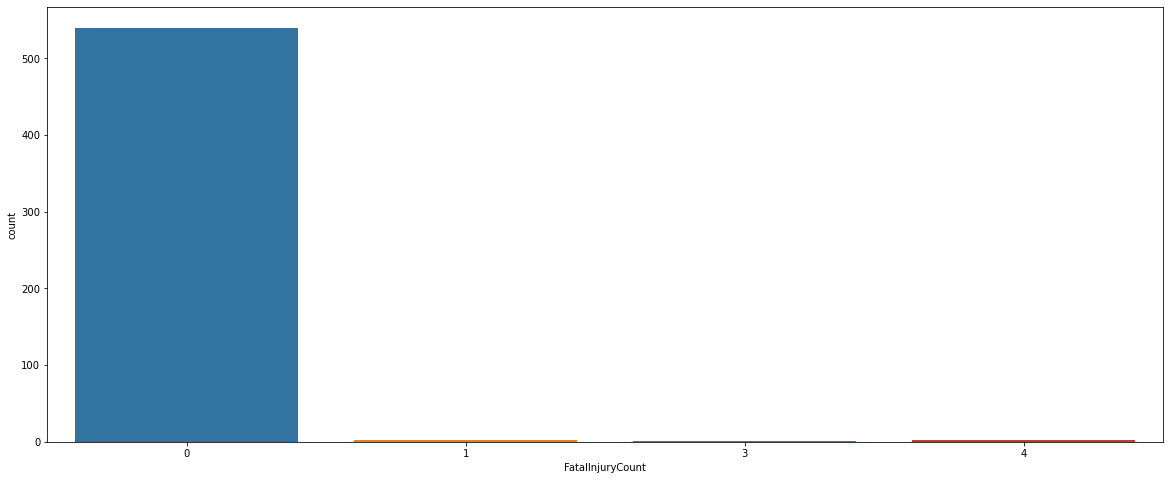

In [442]:
sns.countplot(flight_df['FatalInjuryCount'])

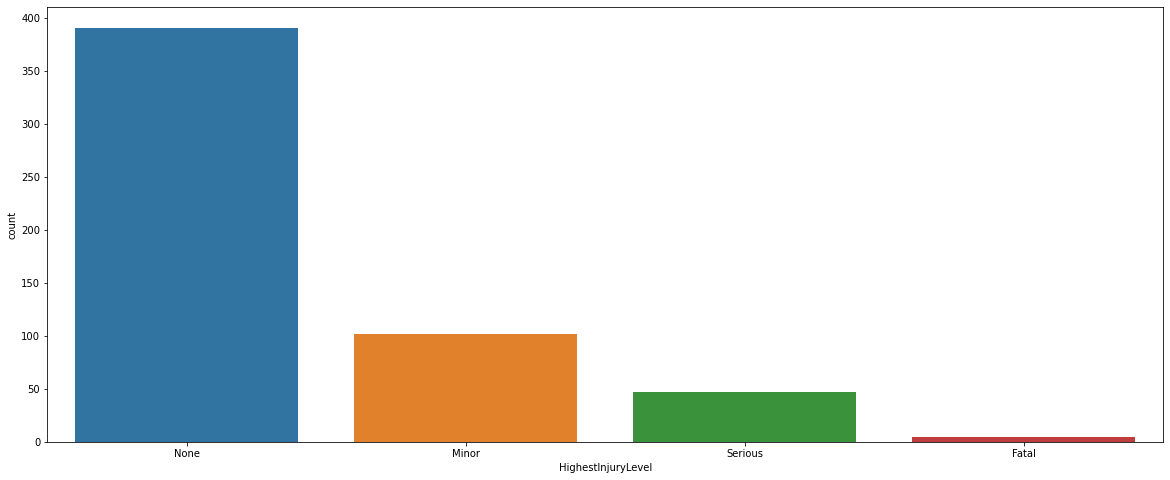

In [443]:
sns.countplot(flight_df['HighestInjuryLevel'])

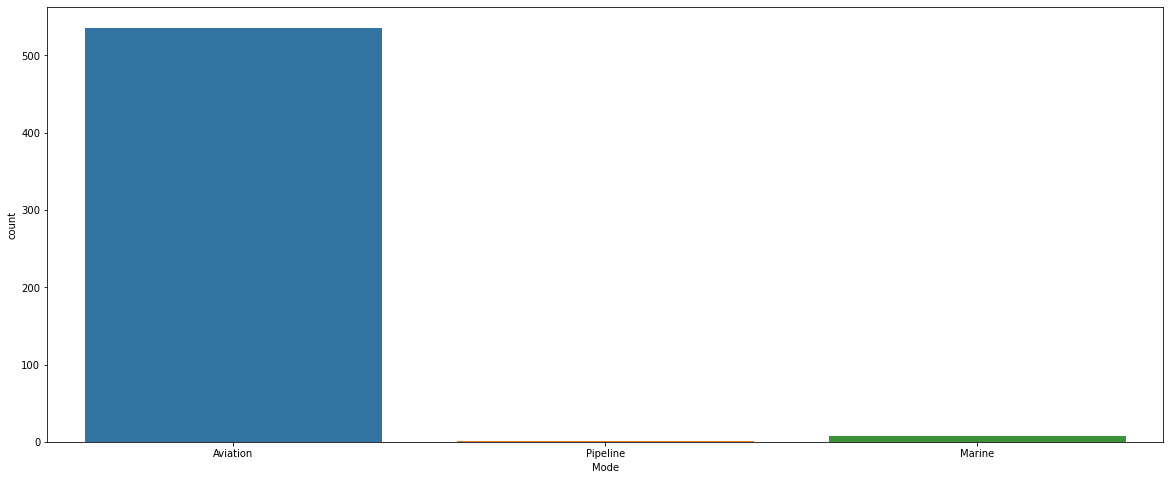

In [444]:
sns.countplot(flight_df['Mode'])

In [358]:
flight_df

,index,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,0,44464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain adequate clearanc...,Personnel issues - Psychological - Attention/m...
1,1,44458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure attain proper touchdown po...,Aircraft - Aircraft systems - Communications s...
2,2,44456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,The pilot flight instructor’s failure ensure l...,Personnel issues - Task performance - Use of e...
3,3,44455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
4,4,44455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use of e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,44065,Tok,Alaska,False,Aviation,None,0,0,0,pilot_issue,The student pilot’s failure maintain direction...,Aircraft - Aircraft oper/perf/capability - Per...
541,541,44064,Kotzebue,Alaska,False,Aviation,None,0,0,0,pilot_issue,The pilot's failure maintain airspeed conduciv...,Aircraft - Aircraft oper/perf/capability - Per...
542,542,44064,Athens,Texas,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure extend landing gear approa...,Personnel issues - Task performance - Use of e...
543,543,44064,Corsicana,Texas,False,Aviation,None,0,0,0,pilot_issue,The student pilot maintain control airplane ta...,Aircraft - Aircraft oper/perf/capability - Per...


In [359]:
flight_df.groupby('Category').count()

,index,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,Findings
Category,,,,,,,,,,,,
environment_issue,32,32,32,32,32,32,32,32,32,32,32,32
flight_issue,37,37,37,37,37,37,37,37,37,37,37,37
pilot_issue,476,476,476,476,476,476,476,476,476,476,476,476


Year 2020 has large number of accidents

In [360]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
flight_df['Findings'] = flight_df['Findings'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
flight_df['Findings'].head()


0    Personnel issues - Psychological - Attention/m...
1    Aircraft - Aircraft systems - Communications s...
2    Personnel issues - Task performance - Use equi...
3    Personnel issues - Task performance - Use equi...
4    Personnel issues - Task performance - Use equi...
Name: Findings, dtype: object

In [361]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
flight_df['Findings'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0      personnel issu - psycholog - attention/monitor...
1      aircraft - aircraft system - commun system - (...
2      personnel issu - task perform - use equip/info...
3      personnel issu - task perform - use equip/info...
4      personnel issu - task perform - use equip/info...
                             ...                        
540    aircraft - aircraft oper/perf/cap - performanc...
541    aircraft - aircraft oper/perf/cap - performanc...
542    personnel issu - task perform - use equip/info...
543    aircraft - aircraft oper/perf/cap - performanc...
544    organiz issu - support/oversight/monitor - doc...
Name: Findings, Length: 545, dtype: object

In [362]:
stop_words = list(stopwords.words('english'))

In [363]:
flight_df[flight_df['Category'] == 'environment_issue']['Findings']

6      Environmental issues - Physical environment - ...
10     Environmental issues - Physical environment - ...
50     Not determined - Not determined - (general) - ...
51     Environmental issues - Conditions/weather/phen...
71     Environmental issues - Physical environment - ...
92     Environmental issues - Physical environment - ...
135    Personnel issues - Action/decision - Action - ...
186    Aircraft - Aircraft power plant - Engine contr...
197    Environmental issues - Physical environment - ...
202    Aircraft - Fluids/misc hardware - Fluids - Fue...
209    Not determined - Not determined - (general) - ...
215    Environmental issues - Physical environment - ...
218    Environmental issues - Physical environment - ...
235    Environmental issues - Conditions/weather/phen...
264    Environmental issues - Conditions/weather/phen...
304    Environmental issues - Physical environment - ...
330    Environmental issues - Conditions/weather/phen...
350    Environmental issues - C

In [364]:
corpus_env = flight_df[flight_df['Category'] == 'environment_issue']['Findings'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus_env

6      Environmental issues - Physical environment - ...
10     Environmental issues - Physical environment - ...
50     Not determined - Not determined - (general) - ...
51     Environmental issues - Conditions/weather/phen...
71     Environmental issues - Physical environment - ...
92     Environmental issues - Physical environment - ...
135    Personnel issues - Action/decision - Action - ...
186    Aircraft - Aircraft power plant - Engine contr...
197    Environmental issues - Physical environment - ...
202    Aircraft - Fluids/misc hardware - Fluids - Fue...
209    Not determined - Not determined - (general) - ...
215    Environmental issues - Physical environment - ...
218    Environmental issues - Physical environment - ...
235    Environmental issues - Conditions/weather/phen...
264    Environmental issues - Conditions/weather/phen...
304    Environmental issues - Physical environment - ...
330    Environmental issues - Conditions/weather/phen...
350    Environmental issues - C

In [365]:
wc_a = ' '.join(corpus_env)

# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 

Word Cloud for Apple_Tweets (after cleaning)!!


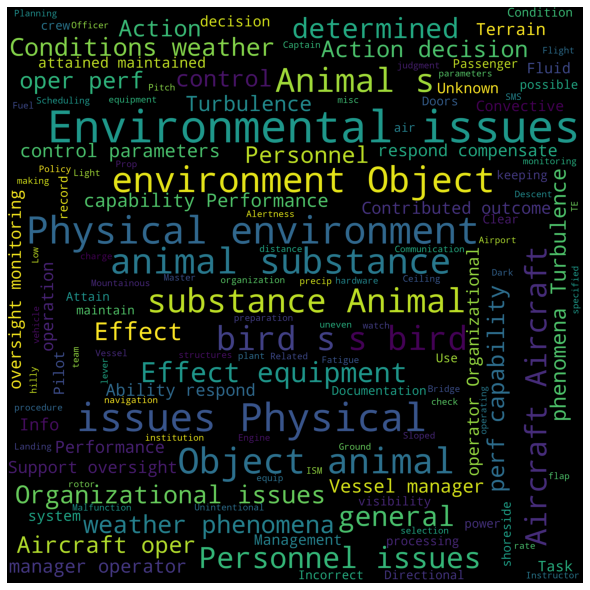

In [366]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

In [367]:
corpus_flight = flight_df[flight_df['Category'] == 'flight_issue']['Findings'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus_flight

14     Aircraft - Fluids/misc hardware - Fluids - Fue...
15     Aircraft - Aircraft power plant - (general) - ...
18     Personnel issues - Task performance - Use equi...
60     Personnel issues - Task performance - Use equi...
82     Aircraft - Fluids/misc hardware - Fluids - Fue...
89     Aircraft - Aircraft systems - Flight control s...
104    Aircraft - Fluids/misc hardware - Fluids - Fue...
105    Aircraft - Aircraft systems - Air conditioning...
122    Environmental issues - Conditions/weather/phen...
127    Personnel issues - Task performance - Maintena...
133    Environmental issues - Conditions/weather/phen...
182    Environmental issues - Physical environment - ...
204    Not determined - Not determined - (general) - ...
208    Personnel issues - Task performance - Use equi...
214    Not determined - Not determined - (general) - ...
247    Aircraft - Aircraft systems - Landing gear sys...
261    Personnel issues - Experience/knowledge - Trai...
291    Not determined - Not det

In [368]:
wc_b = ' '.join(corpus_flight)

# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_b) 

Word Cloud for Apple_Tweets (after cleaning)!!


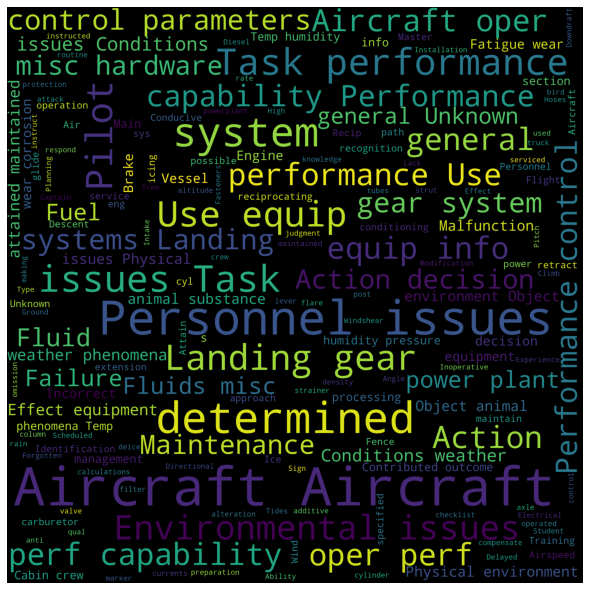

In [369]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

In [370]:
corpus_pilot = flight_df[flight_df['Category'] == 'pilot_issue']['Findings'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus_pilot

0      Personnel issues - Psychological - Attention/m...
1      Aircraft - Aircraft systems - Communications s...
2      Personnel issues - Task performance - Use equi...
3      Personnel issues - Task performance - Use equi...
4      Personnel issues - Task performance - Use equi...
                             ...                        
539    Aircraft - Aircraft oper/perf/capability - Per...
540    Aircraft - Aircraft oper/perf/capability - Per...
541    Aircraft - Aircraft oper/perf/capability - Per...
542    Personnel issues - Task performance - Use equi...
543    Aircraft - Aircraft oper/perf/capability - Per...
Name: Findings, Length: 476, dtype: object

In [371]:
wc_c = ' '.join(corpus_flight)

# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_c) 

Word Cloud for Apple_Tweets (after cleaning)!!


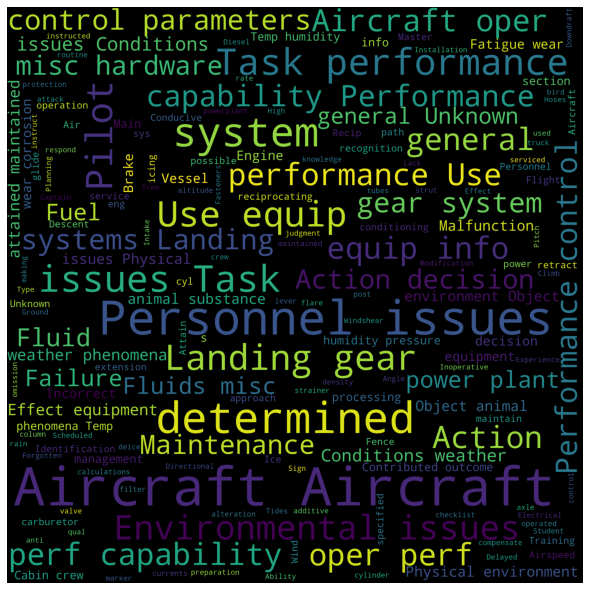

In [372]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

In [373]:
flight_df

,index,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,0,44464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain adequate clearanc...,Personnel issues - Psychological - Attention/m...
1,1,44458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure attain proper touchdown po...,Aircraft - Aircraft systems - Communications s...
2,2,44456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,The pilot flight instructor’s failure ensure l...,Personnel issues - Task performance - Use equi...
3,3,44455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use equi...
4,4,44455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure maintain directional contr...,Personnel issues - Task performance - Use equi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,44065,Tok,Alaska,False,Aviation,None,0,0,0,pilot_issue,The student pilot’s failure maintain direction...,Aircraft - Aircraft oper/perf/capability - Per...
541,541,44064,Kotzebue,Alaska,False,Aviation,None,0,0,0,pilot_issue,The pilot's failure maintain airspeed conduciv...,Aircraft - Aircraft oper/perf/capability - Per...
542,542,44064,Athens,Texas,False,Aviation,None,0,0,0,pilot_issue,The pilot’s failure extend landing gear approa...,Personnel issues - Task performance - Use equi...
543,543,44064,Corsicana,Texas,False,Aviation,None,0,0,0,pilot_issue,The student pilot maintain control airplane ta...,Aircraft - Aircraft oper/perf/capability - Per...


In [374]:
flight_df['ProbableCause']

0      The pilot’s failure maintain adequate clearanc...
1      The pilot’s failure attain proper touchdown po...
2      The pilot flight instructor’s failure ensure l...
3      The pilot’s failure maintain directional contr...
4      The pilot’s failure maintain directional contr...
                             ...                        
540    The student pilot’s failure maintain direction...
541    The pilot's failure maintain airspeed conduciv...
542    The pilot’s failure extend landing gear approa...
543    The student pilot maintain control airplane ta...
544    The National Transportation Safety Board deter...
Name: ProbableCause, Length: 545, dtype: object

In [375]:
# Remove Tags
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)

flight_df['ProbableCause'] = flight_df['ProbableCause'].apply(remove_tags)

In [376]:
# Remove Special Characters
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews

flight_df['ProbableCause'] = flight_df['ProbableCause'].apply(special_char)

In [377]:
# Convert to Lower Case
def convert_lower(text):
   return text.lower()

flight_df['ProbableCause'] = flight_df['ProbableCause'].apply(convert_lower)
flight_df['ProbableCause'][1]

'the pilot s failure attain proper touchdown point runway landing gusting wind conditions  resulted runway overrun  contributing accident pilot s distraction due electrical issue '

In [378]:
# Remove Stopwords
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

flight_df['ProbableCause'] = flight_df['ProbableCause'].apply(remove_stopwords)
flight_df['ProbableCause'][1]

['pilot',
 'failure',
 'attain',
 'proper',
 'touchdown',
 'point',
 'runway',
 'landing',
 'gusting',
 'wind',
 'conditions',
 'resulted',
 'runway',
 'overrun',
 'contributing',
 'accident',
 'pilot',
 'distraction',
 'due',
 'electrical',
 'issue']

In [379]:
# Lemmatizing Words
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

flight_df['ProbableCause'] = flight_df['ProbableCause'].apply(lemmatize_word)
flight_df['ProbableCause'][1]

'pilot failure attain proper touchdown point runway landing gusting wind condition resulted runway overrun contributing accident pilot distraction due electrical issue'

In [380]:
# Final Data after cleaning
flight_df.head()

,index,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,0,44464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,pilot failure maintain adequate clearance park...,Personnel issues - Psychological - Attention/m...
1,1,44458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,pilot failure attain proper touchdown point ru...,Aircraft - Aircraft systems - Communications s...
2,2,44456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,pilot flight instructor failure ensure landing...,Personnel issues - Task performance - Use equi...
3,3,44455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,pilot failure maintain directional control tai...,Personnel issues - Task performance - Use equi...
4,4,44455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,pilot failure maintain directional control tax...,Personnel issues - Task performance - Use equi...


In [381]:
flight_df

,index,EventDate,City,State,HasSafetyRec,Mode,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Category,ProbableCause,Findings
0,0,44464,Patterson,Louisiana,False,Aviation,None,0,0,0,pilot_issue,pilot failure maintain adequate clearance park...,Personnel issues - Psychological - Attention/m...
1,1,44458,Grass Valley,California,False,Aviation,None,0,0,0,pilot_issue,pilot failure attain proper touchdown point ru...,Aircraft - Aircraft systems - Communications s...
2,2,44456,Osage Beach,Missouri,False,Aviation,None,0,0,0,pilot_issue,pilot flight instructor failure ensure landing...,Personnel issues - Task performance - Use equi...
3,3,44455,Battle Creek,Michigan,False,Aviation,None,0,0,0,pilot_issue,pilot failure maintain directional control tai...,Personnel issues - Task performance - Use equi...
4,4,44455,Ypsilanti,Michigan,False,Aviation,None,0,0,0,pilot_issue,pilot failure maintain directional control tax...,Personnel issues - Task performance - Use equi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,44065,Tok,Alaska,False,Aviation,None,0,0,0,pilot_issue,student pilot failure maintain directional con...,Aircraft - Aircraft oper/perf/capability - Per...
541,541,44064,Kotzebue,Alaska,False,Aviation,None,0,0,0,pilot_issue,pilot failure maintain airspeed conducive flig...,Aircraft - Aircraft oper/perf/capability - Per...
542,542,44064,Athens,Texas,False,Aviation,None,0,0,0,pilot_issue,pilot failure extend landing gear approach lan...,Personnel issues - Task performance - Use equi...
543,543,44064,Corsicana,Texas,False,Aviation,None,0,0,0,pilot_issue,student pilot maintain control airplane takeof...,Aircraft - Aircraft oper/perf/capability - Per...


In [382]:
from sklearn.feature_extraction.text import CountVectorizer

x = np.array(flight_df.iloc[:,0].values)
y = np.array(flight_df['Category'].values)

cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(flight_df.ProbableCause).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (545, 880)
y.shape =  (545,)


In [383]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle = True)

print(len(x_train))
print(len(x_test))

381
164


In [384]:
#create list of model and accuracy dicts

perform_list = [ ]

def run_model(model_name):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    
    print(f'Test Accuracy Score of Basic {model_name} {accuracy}%')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),
                              ('Precision', round(precision, 2)),('Recall', round(recall, 2)),
                              ('F1', round(f1score, 2))]))

In [385]:
run_model('Logistic Regression')

Test Accuracy Score of Basic Logistic Regression 89.02%
Precision : 0.8902439024390244
Recall : 0.8902439024390244
F1-score : 0.8902439024390244


In [386]:
run_model('Random Forest')

Test Accuracy Score of Basic Random Forest 88.41%
Precision : 0.8841463414634146
Recall : 0.8841463414634146
F1-score : 0.8841463414634146


In [387]:
run_model('Multinomial Naive Bayes')

Test Accuracy Score of Basic Multinomial Naive Bayes 86.59%
Precision : 0.8658536585365854
Recall : 0.8658536585365854
F1-score : 0.8658536585365854


In [388]:
run_model('Support Vector Classifer')

Test Accuracy Score of Basic Support Vector Classifer 86.59%
Precision : 0.8658536585365854
Recall : 0.8658536585365854
F1-score : 0.8658536585365854


In [389]:
run_model('Decision Tree Classifier')

Test Accuracy Score of Basic Decision Tree Classifier 87.2%
Precision : 0.8719512195121951
Recall : 0.8719512195121951
F1-score : 0.8719512195121951


In [390]:
run_model('K Nearest Neighbour')

Test Accuracy Score of Basic K Nearest Neighbour 85.37%
Precision : 0.8536585365853658
Recall : 0.8536585365853658
F1-score : 0.8536585365853658


In [391]:
run_model('Gaussian Naive Bayes')

Test Accuracy Score of Basic Gaussian Naive Bayes 81.1%
Precision : 0.8109756097560976
Recall : 0.8109756097560976
F1-score : 0.8109756097560975


In [392]:
model_performance = pd.DataFrame(data=perform_list)
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,89.02,0.89,0.89,0.89
1,Random Forest,88.41,0.88,0.88,0.88
2,Multinomial Naive Bayes,86.59,0.87,0.87,0.87
3,Support Vector Classifer,86.59,0.87,0.87,0.87
4,Decision Tree Classifier,87.20,0.87,0.87,0.87
5,K Nearest Neighbour,85.37,0.85,0.85,0.85
6,Gaussian Naive Bayes,81.10,0.81,0.81,0.81


In [393]:
classifier = LogisticRegression().fit(x_train, y_train)

In [394]:
y_pred1 = cv.transform(['The pilot’s inadequate fuel management, resulted total loss engine power due fuel starvation, pilot’s inadequate preflight inspection preflight fuel planning.'])
y_pred2 = cv.transform(['The airplane’s encounter turbulence descent, resulted serious injury flight attendant.'])

In [395]:
pred = classifier.predict(y_pred1)

print(pred)

['pilot_issue']


In [396]:
pred

array(['pilot_issue'], dtype=object)

In [397]:
test = pd.read_excel("aircraft_test.xlsx", usecols = ['Category', 'ProbableCause'])

In [398]:
test

,Category,ProbableCause
0,NaN,The pilot's failure maintain directional contr...
1,NaN,The pilot's loss directional control landing.
2,NaN,The National Transportation Safety Board deter...
3,NaN,The pilot's failure maintain clearance taxiway...
4,NaN,The pilot’s failure maintain altitude short fi...
...,...,...
450,NaN,"The pilot's poor preflight planning, failed ve..."
451,NaN,The pilot's failure maintain proper descent ra...
452,NaN,"The airplane’s encounter turbulence descent, r..."
453,NaN,"The pilot’s inadequate fuel management, result..."


In [399]:
test_input = cv.transform(test.ProbableCause.values)
test_pred = classifier.predict(test_input)
test['Category'] = test_pred
test

,Category,ProbableCause
0,pilot_issue,The pilot's failure maintain directional contr...
1,pilot_issue,The pilot's loss directional control landing.
2,flight_issue,The National Transportation Safety Board deter...
3,pilot_issue,The pilot's failure maintain clearance taxiway...
4,pilot_issue,The pilot’s failure maintain altitude short fi...
...,...,...
450,pilot_issue,"The pilot's poor preflight planning, failed ve..."
451,pilot_issue,The pilot's failure maintain proper descent ra...
452,environment_issue,"The airplane’s encounter turbulence descent, r..."
453,pilot_issue,"The pilot’s inadequate fuel management, result..."


In [400]:
test.to_csv("Aircraft_final.csv")

In [401]:
import pickle

In [402]:
pickle_out=open("flight_risk_flask.pkl","wb")
pickle.dump(classifier,pickle_out)
loaded_model=pickle.load(open("flight_risk_flask.pkl","rb"))
loaded_model.predict('Aircraft - Aircraft oper/perf/capability - Performance/control parameters - Directional control - Not attained/maintained, Personnel issues - Task performance - Use of equip/info - Aircraft control - Pilot')
result=loaded_model.score(x_test,y_test)
print(result)

ValueError: Expected 2D array, got scalar array instead:
array=Aircraft - Aircraft oper/perf/capability - Performance/control parameters - Directional control - Not attained/maintained, Personnel issues - Task performance - Use of equip/info - Aircraft control - Pilot.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
test_input = cv.transform(['Aircraft - Aircraft oper/perf/capability - Performance/control parameters - Directional control - Not attained/maintained, Personnel issues - Task performance - Use of equip/info - Aircraft control - Pilot'])
test_pred = classifier.predict(test_input)

In [ ]:
test_pred

In [403]:
test_input

<455x880 sparse matrix of type '<class 'numpy.int64'>'
	with 5316 stored elements in Compressed Sparse Row format>